<a href="https://colab.research.google.com/github/hfelizzola/Curso-Anal-tica-Datos-Corficolombiana/blob/main/Exploracion_Preparacion_Datos_Curso_Corficolombiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos




## Caso: Análisis de Riesgos de Desviaciones en Proyectos de Vías Rurales en Colombia

En el desarrollo de proyectos de infraestructura vial rural en Colombia, es común enfrentarse a riesgos de retrasos y sobrecostos que impactan negativamente su finalización y presupuesto. Estos riesgos pueden surgir por diversas razones, como condiciones geográficas, ineficiencias en el proceso de contratación, cambios en los materiales, factores climáticos, y problemas administrativos o financieros. El objetivo es desarrollar un modelo de machine learning que pueda predecir el riesgo de que un proyecto incurra en retrasos en el tiempo de ejecución o sobrecostos con respecto a la cuantía inicialmente acordada.

El modelo pretende apoyar a las entidades gubernamentales y contratistas en la identificación temprana de proyectos con alto riesgo de desviaciones. Esto facilitará la implementación de medidas preventivas y correctivas para garantizar la ejecución oportuna y eficiente de los recursos. Para lograrlo, se cuenta con un conjunto de datos históricos sobre contratos para la construcción y mantenimiento de vías rurales, que contiene información financiera, contractual y de ejecución de cada proyecto.

## Configuración inicial del notebook

Antes de comenzar el proceso de análisis exploratorio de los datos debe asegurar que las librerias esten cargadas y la carpeta de trabajo este configurada.

In [1]:
# Librerias para Ciencia de Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')


Dentro de la carpeta de google colab deben crear una carpeta con el nombre`Curso Corficolombiana`.

In [2]:
# Conectar con carpeta de Google Colab
from google.colab import drive
drive.mount('/content/drive')
# Setup working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/Curso Corficolombiana')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Exploracion-Preparacion-Datos-Curso-Corficolombiana.ipynb
vias_rurales_secop_i_raw_data_v13082024.csv


## Exploración y entendimiento de los datos

La fase de exploración y entendimiento de los datos tiene como objetivo identificar y comprender las características de las variables que podrían influir en las desviaciones en tiempo y costo de los proyectos de vías rurales. En esta etapa, se busca *detectar patrones, relaciones y posibles problemas en los datos, como valores atípicos o faltantes, que podrían afectar el análisis posterior*. Las tareas básicas incluyen:

* Examinar la distribución de las variables clave
* Analizar correlaciones entre factores financieros y temporales
* Explorar la influencia de variables categóricas como la modalidad de contratación o el tipo de entidad en los riesgos asociados a los proyectos.

Este análisis inicial es crucial para definir la preparación y curación de los datos de cara al desarrollo de modelos predictivos efectivos.

### Cargar y revisar la estructura de los datos

In [3]:
# Carga de datos
datos = pd.read_csv('vias_rurales_secop_i_raw_data_v13082024.csv')

# Revisa las primeras y últimas filas para tener una idea general de los registros
datos.head(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51960000,51960000,0,51960000,2015,2015-04-28T00:00:00.000,2015-05-12T00:00:00.000,2,M,0,0,2015-07-12T00:00:00.000,3896250,{'url': 'https://www.contratos.gov.co/consulta...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149999947,149999946,0,149999946,2015,2015-10-19T00:00:00.000,2015-10-19T00:00:00.000,2,M,0,0,2015-12-19T00:00:00.000,3984265,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150000000,142967967,0,142967967,2022,2022-03-17T00:00:00.000,2022-07-01T00:00:00.000,8,M,0,0,2023-03-01T00:00:00.000,12021477,{'url': 'https://www.contratos.gov.co/consulta...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162103043,162084746,75000000,237084746,2020,2020-03-10T00:00:00.000,2020-04-01T00:00:00.000,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467516765,441787828,158201644,599989472,2021,2021-03-08T00:00:00.000,2021-03-11T00:00:00.000,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO


In [4]:
datos.tail(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso
974,15-11-4158615-3916756,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,36980184,36980171,0,36980171,2015,2015-09-18T00:00:00.000,2015-09-18T00:00:00.000,1,M,0,0,2015-10-18T00:00:00.000,3916756,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9000714112,SANTANDER,PIEDECUESTA,INGENIERIA Y SERVICIOS DE COLOMBIA SAS,LIQUIDADO
975,19-13-9651959-8811107,ANTIOQUIA - ALCALDIA MUNICIPIO DE OLAYA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PREVENTIVO DE LA VIA TERCIARIA Q...,23000000,23000000,0,23000000,2019,2019-07-10T00:00:00.000,2019-07-15T00:00:00.000,20,D,0,0,2019-08-04T00:00:00.000,8811107,{'url': 'https://www.contratos.gov.co/consulta...,800026156-5,901051754,ANTIOQUIA,OLAYA,INSUMOS INMOBILIARIOS Y CAFETEROS S.A.S,LIQUIDADO
976,21-13-11996798-11158224,TOLIMA - ALCALDIA MUNICIPIO DE CHAPARRAL,TOLIMA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PUENTE PARA CAMINO DE HERRADURA ...,25400813,25340900,0,25340900,2021,2021-06-09T00:00:00.000,2021-06-11T00:00:00.000,45,D,0,0,2021-07-26T00:00:00.000,11158224,{'url': 'https://www.contratos.gov.co/consulta...,800100053,80057163,TOLIMA,CHAPARRAL,WILLIAM RICARDO MORALES ANDRADE,LIQUIDADO
977,19-11-9968957-9216325,BOYACA - ALCALDIA MUNICIPIO DE SAMACA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA PARA EL ACCESO AL...,81326035,81315081,0,81315081,2019,2019-11-13T00:00:00.000,2019-11-15T00:00:00.000,20,D,0,0,2019-12-05T00:00:00.000,9216325,{'url': 'https://www.contratos.gov.co/consulta...,800016757,901339663,BOYACA,SAMACA,CONSORCIO HUELLAS SANTO DOMINGO,LIQUIDADO
978,19-21-12467-9123539,ANTIOQUIA - ALCALDIA MUNICIPIO DE ANGOSTURA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION A TODO COSTO DE UN (1) KILOMETRO ...,398344885,398330315,62400000,460730315,2019,2019-09-16T00:00:00.000,2019-10-16T00:00:00.000,2,M,30,5,2020-06-16T00:00:00.000,9123539,{'url': 'https://www.contratos.gov.co/consulta...,890982141-2,811013361,ANTIOQUIA,ANGOSTURA,CONSTRUCCIONES D.L. Y CIA LTDA,LIQUIDADO


**Información general del conjunto de datos:**

* Filas: 3364 contratos.
* Columnas: 28 atributos o características del contrato.
* Tipos de datos:

  * 9 columnas numéricas (int64): incluyen información financiera y de tiempo, como *cuantia_proceso, cuantia_contrato, valor_total_de_adiciones, y plazo_de_ejec_del_contrato*.
  * 19 columnas tipo texto (object): detalles textuales como *nombre_de_la_entidad, departamento_entidad, modalidad, fechas y estado del proceso.*

* Valores nulos: Ninguna columna tiene valores nulos, todas las columnas están completamente llenas.

**¿Qué variable no estan en el formato correcto?**

* var1
* var2
* ...

Esta información es valiosa para luego realizar el procesamiento y preparación de los datos.

In [5]:
# Comprueba la estructura de las columnas (tipos de datos y nombres).
# Analiza la forma del dataset (número de filas y columnas).
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uid                             979 non-null    object
 1   nombre_de_la_entidad            979 non-null    object
 2   departamento_entidad            979 non-null    object
 3   orden_entidad                   979 non-null    object
 4   modalidad                       979 non-null    object
 5   causal_contratacion_directa     979 non-null    object
 6   objeto_a_contratar              979 non-null    object
 7   detalle_objeto                  979 non-null    object
 8   cuantia_proceso                 979 non-null    int64 
 9   cuantia_contrato                979 non-null    int64 
 10  valor_total_de_adiciones        979 non-null    int64 
 11  valor_contrato_con_adiciones    979 non-null    int64 
 12  anno_firma                      979 non-null    in

### Análisis de las Desviaciones Costo

In [6]:
# ¿Cuántos proyectos presentan sobrecostos?
sum(datos['valor_total_de_adiciones'] > 0)

187

In [7]:
# Crear una columna binaria para indicar sobrecostos
datos['tiene_sobrecosto'] = datos['valor_total_de_adiciones'] > 0
sum(datos['tiene_sobrecosto'])

187

In [8]:
# Proyectos con y sin sobrecostos
datos.groupby('tiene_sobrecosto').size()

,0
tiene_sobrecosto,
False,792
True,187


In [9]:
# ¿Qué proporción de proyectos presentan sobrecostos?
datos['tiene_sobrecosto'].mean()

0.19101123595505617

In [10]:
# ¿Cuanto es el sobre costo de los proyectos analizados?
datos['valor_total_de_adiciones'].sum()

32097532456

In [11]:
# Sobrecosto escalado millones
# 1e6: 1 millon
datos['valor_total_de_adiciones'].sum()/1e6

32097.532456

In [12]:
# Escalar variables del valor del contrato en millones
datos['cuantia_proceso'] = datos['cuantia_proceso'] / 1e6
datos['cuantia_contrato'] = datos['cuantia_contrato'] / 1e6
datos['valor_total_de_adiciones'] = datos['valor_total_de_adiciones'] / 1e6
datos['valor_contrato_con_adiciones'] = datos['valor_contrato_con_adiciones'] / 1e6

In [13]:
# Filtrar contratos con sobrecostos
datos[datos['valor_total_de_adiciones'] > 0]

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,75.000000,237.084746,2020,2020-03-10T00:00:00.000,2020-04-01T00:00:00.000,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,158.201644,599.989472,2021,2021-03-08T00:00:00.000,2021-03-11T00:00:00.000,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True
5,22-13-12893871-11958803,NORTE DE SANTANDER - ALCALDIA MUNICIPIO DE ABREGO,NORTE DE SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 3,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO DE LAS VIAS TERCI...,27.990806,23.508500,11.590625,35.099125,2022,2022-02-18T00:00:00.000,2022-02-18T00:00:00.000,2,M,0,0,2022-04-18T00:00:00.000,11958803,{'url': 'https://www.contratos.gov.co/consulta...,890981195-5,9009652722,SANTANDER,ABREGO,ISMACOM S.A.S NIT: 900965272-2 REPRESENTADA L...,LIQUIDADO,True
8,18-1-190669-7618772,SANTANDER - ALCALDIA MUNICIPIO DE BUCARAMANGA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLAS Y REPOSICION DE ...,1277.358628,1250.571151,400.000000,1650.571151,2018,2018-07-10T00:00:00.000,2018-08-27T00:00:00.000,3,M,30,0,2018-12-27T00:00:00.000,7618772,{'url': 'https://www.contratos.gov.co/consulta...,890201222,901193544,SANTANDER,BUCARAMANGA,CONSORCIO VARGAS NP INGENIERIA,LIQUIDADO,True
12,15-11-3913923-3794831,ANTIOQUIA - ALCALDIA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",PAVIMENTACION EN CONCRETO RIGIDO Y OBRAS COMPL...,289.381904,288.881726,144.440863,433.322589,2015,2015-07-13T00:00:00.000,2015-07-27T00:00:00.000,2,M,0,1,2015-10-27T00:00:00.000,3794831,{'url': 'https://www.contratos.gov.co/consulta...,890204646-3,900434281-0,ANTIOQUIA,RIONEGRO,CONSTRUCCIONES SEGURAS S.A.S,LIQUIDADO,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,18-13-8118609-7389776,CALDAS - ALCALDIA MUNICIPIO DE MANZANARES,CALDAS,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATAR LAS OBRAS DE CONSTRUCCION DE 80ML DE...,21.800000,21.784000,5.967500,27.751500,2018,2018-06-06T00:00:00.000,2018-06-06T00:00:00.000,45,D,0,0,2018-07-21T00:00:00.000,7389776,{'url': 'https://www.contratos.gov.co/consulta...,800094711-3,15985491,CALDAS,MANZANARES,CARLOS EGDARDO HURTADO JIMNEZ,LIQUIDADO,True
957,22-21-30570-12314069,ANTIOQUIA - ALCALDIA MUNICIPIO DE MACEO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICI

In [14]:
# Resumen estadístico de los sobrecostos de los proyectos
sobrecostos = datos[datos['valor_total_de_adiciones'] > 0]['valor_total_de_adiciones']

sobrecostos.describe()

,valor_total_de_adiciones
count,187.000000
mean,171.644559
std,685.696784
min,2.460000
25%,12.963107
50%,39.567801
75%,90.187531
max,6971.817467


En la distribución de los sobrecostos se puede observar la presencia de datos extremos (outliers). Por tanto, es el proceso de limpieza es necesario incluir una tarea para el tratamiento de este tipo de observaciones.

> <font color="green"> **Tip Práctico:** Tras la exploración inicial de los datos, elabore una lista de tareas de limpieza y ejecútelas.  Itere sobre estas tareas hasta que el comportamiento de las variables se estabilice.</font>

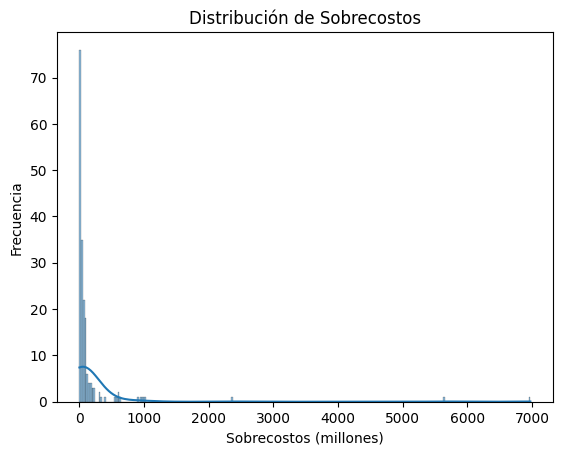

In [15]:
# Distribución de las desviaciones en costo
sns.histplot(sobrecostos, kde=True)
plt.title('Distribución de Sobrecostos')
plt.xlabel('Sobrecostos (millones)')
plt.ylabel('Frecuencia')
plt.show()

Para identificar posibles outliers puede calcular los percentiles más altos (90%-99%)

In [16]:
# Calcular los percentiles del sobrecosto entre el 90% y 99% con incrementos en 1%
sobrecostos.quantile(np.arange(0.9, 1, 0.01))

,valor_total_de_adiciones
0.90,218.757687
0.91,229.398848
0.92,300.724781
0.93,349.566432
0.94,526.000000
0.95,591.463125
0.96,615.299434
0.97,918.932569
0.98,979.824996
0.99,2828.814230


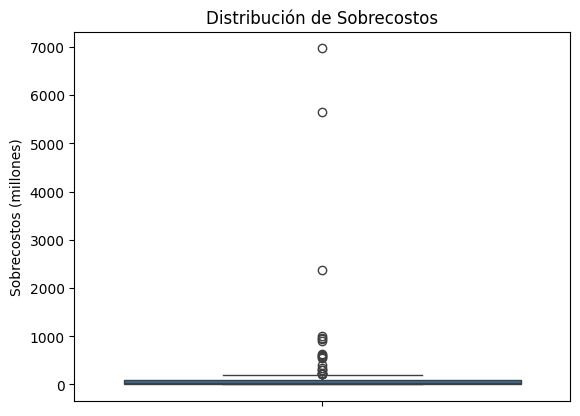

In [17]:
# Gráfico de caja para la distribución del sobrecosto
sns.boxplot(sobrecostos)
plt.title('Distribución de Sobrecostos')
plt.ylabel('Sobrecostos (millones)')
plt.show()

> <font color="green">**Tip Práctico:** aplicar una transformación logarítmica a las variables numéricas que presentan cambios significativos en el orden de magnitud para reducir la asimetría y la variabilidad de los datos. Esto ayuda a estabilizar la varianza, resaltar patrones que podrían estar ocultos debido a valores extremos y mejorar el rendimiento de modelos estadísticos o de machine learning al aproximar las distribuciones a una forma más normal. Sin embargo, esta transformación solo debe aplicarse a variables positivas y debe interpretarse con cuidado, ya que los valores transformados estarán en una escala diferente a la original.</font>

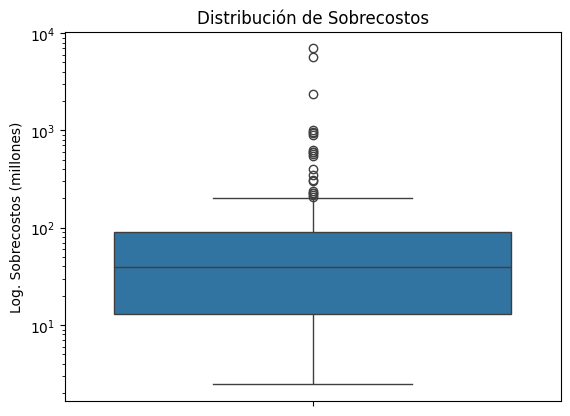

In [18]:
# Gráfico de caja para la distribución del sobrecosto
sns.boxplot(sobrecostos)
plt.title('Distribución de Sobrecostos')
plt.ylabel('Log. Sobrecostos (millones)')
plt.yscale('log')
plt.show()

**Desviación Porcentual del Valor del Proyecto**

Calcular una métrica porcentual para medir la desviación en costo es fundamental porque permite estandarizar la comparación entre proyectos de diferentes tamaños y cuantías. Mientras que una desviación absoluta solo muestra el cambio en términos monetarios, el cálculo porcentual refleja la magnitud del sobrecosto relativo al presupuesto original, lo cual facilita entender el impacto real de la desviación y comparar el desempeño financiero de distintos proyectos de manera más equitativa y comprensible.

$$
\text{% Desviación en Costo} = \left( \frac{\text{Valor Final del Contrato - Valor Inicial del Contrato}}{\text{Valor Inicial del Contrato}} \right) \times 100
$$

In [19]:
# Generar un nueva columna con el sobrecosto porcentual respecto al valor del contrato
datos['sobrecosto_porcentual'] = ((datos['valor_contrato_con_adiciones'] - datos['cuantia_contrato']) / datos['cuantia_contrato']) * 100

# Resumen estadístico del sobrecosto porcentual
datos[datos['sobrecosto_porcentual'] > 0]['sobrecosto_porcentual'].describe()

,sobrecosto_porcentual
count,187.000000
mean,30.454412
std,18.286685
min,1.525025
25%,14.111720
50%,30.163888
75%,47.932447
max,100.000000


<font color="red">**Alerta!!!:** El sobrecosto porcentual muestra un máximo de 100%. La ley de contratación en Colombia indica que los contratos pueden tener adiciones de hasta un máximo del 50% del valor inicial del contrato. En este contexto esta restricción es una regla de "negocio" para detectar posibles errores e incosistencias.</font>

In [20]:
# ¿Cuantós contratos presentan un sobrecosto de mas del 50%?
sum(datos['sobrecosto_porcentual'] > 50)

5

In [21]:
# Filtrar contratos con sobrecostos superiores al 50%
datos[datos['sobrecosto_porcentual'] > 50]

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual
99,16-1-160682-5104858,ANTIOQUIA - ALCALDIA MUNICIPIO DE COPACABANA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 3,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLAS EN VIA TERCIARIA...,279.213220,278.821920,139.410960,418.232880,2016,2016-09-19T00:00:00.000,2016-09-20T00:00:00.000,75,D,15,1,2017-01-18T00:00:00.000,5104858,{'url': 'https://www.contratos.gov.co/consulta...,No Definido,71213480,ANTIOQUIA,COPACABANA,GUSTAVO ADOLFO MUNOZ BETANCUR,LIQUIDADO,True,50.000000
139,18-11-8406037-7858990,CESAR - ALCALDIA MUNICIPIO DE PUEBLO BELLO,CESAR,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATO DE OBRA PUBLICA PARA LA CONSTRUCCION ...,673.366714,33.651592,29.687572,63.339164,2018,2018-10-24T00:00:00.000,2018-11-02T00:00:00.000,2,M,0,0,2019-01-02T00:00:00.000,7858990,{'url': 'https://www.contratos.gov.co/consulta...,800103021-1,824001624,CESAR,PUEBLO BELLO,CONSORCIO SANTA RITA,LIQUIDADO,True,88.220409
664,22-12-13054252-12089130,SANTANDER - ALCALDIA MUNICIPIO DE RIONEGRO,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION DIRECTA (LEY 1150 DE 2007),URGENCIA MANIFIESTA (LITERAL A),"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y REHABILITACION DE LAS VIAS TER...,98.848000,98.848000,80.000000,178.848000,2022,2022-04-27T00:00:00.000,2022-04-28T00:00:00.000,2,M,0,0,2022-06-28T00:00:00.000,12089130,{'url': 'https://www.contratos.gov.co/consulta...,890204646,901400219,SANTANDER,RIONEGRO,INCEGRO SAS,LIQUIDADO,True,80.932341
689,18-11-8079890-7940639,CUNDINAMARCA - ALCALDIA MUNICIPIO DE SUPATA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA A LA VERED...,57.000000,56.933965,56.933965,113.867930,2018,2018-06-05T00:00:00.000,2018-06-20T00:00:00.000,2,M,0,0,2018-08-20T00:00:00.000,7940639,{'url': 'https://www.contratos.gov.co/consulta...,899999398,900895806,CUNDINAMARCA,SUPATA,INGENIERIA EN CONSTRUCCIONES E INTERVENTORIAS ...,LIQUIDADO,True,100.000000
693,15-11-4372051-5062390,ANTIOQUIA - ALCALDIA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA EN LA ZONA RURAL ...,231.724402,213.185934,106.592967,319.778901,2015,2015-12-16T00:00:00.000,2016-08-01T00:00:00.000,1,M,0,2,2016-11-01T00:00:00.000,5062390,{'url': 'https://www.contratos.gov.co/consulta...,890204646-3,900920718,ANTIOQUIA,RIONEGRO,900920718-1,LIQUIDADO,True,50.000000


**Principales conclusiones:**

* Contratos con sobrecostos: 187 (N = 979)
* Porcentaje de contratos con sobrecostos: 19.1%
* Total de sobrecostos: $32.097 millones de pesos
* Promedio y mediana de sobrecostos por proyecto: Promedio de 171 millones y una mediana de 39 millones.
* Variación de los sobrecostos: los sobrecostos oscilan entre 2.46 y 6.971 millones, con una desviación estándar de 685 millones, lo que indica una variación significativamente alta.
* Sobrecosto porcentual respecto al valor inicial del contrato: los contratos presentan sobrecostos en promedio del 30.45% respecto al valor inicial.


**Lista de tareas de limpieza pendiente:**

* Revisar contratos con sobrecostos de más del 50%
* Revisar contratos con sobrecostos extremos

### Análisis de las Desviaciones en Tiempo

Ahora repitan el análisis que se desarrolló en las desviaciones en costo con las desviaciones en tiempo. De la exploración genere una lista de tareas de procesamiento y limpieza de datos. Además, señale posibles incosistencias.

Antes vamos desarrolar algunas tareas de limpieza necesarias para el análisis:

1. Crear una columna para unificar las desviaciones en día
2. Unificar la duración del contrato en días.

In [22]:
# Crear una columna para unificar las desviaciones en día
datos['retrasos_dias'] = datos['tiempo_adiciones_en_dias'] + datos['tiempo_adiciones_en_meses']*30

In [23]:
# Verificar si la duración del contrato está en días (D) o meses (M) para asegurar la consistencia en el análisis posterior
datos.groupby(['rango_de_ejec_del_contrato']).size()

,0
rango_de_ejec_del_contrato,
D,382
M,597


In [24]:
# Unificar el rango de la duración del contrato
datos['duracion_contrato_dias'] = datos['plazo_de_ejec_del_contrato']
datos.loc[datos['rango_de_ejec_del_contrato'] == 'M', 'duracion_contrato_dias'] *= 30

In [25]:
# ¿Cuántos proyectos presentan retrasos?


In [26]:
# Crear una columna binaria para indicar retrasos


In [27]:
# Proyectos con y sin retrasos


In [28]:
# ¿Qué proporción de proyectos presentan retrasos?


In [29]:
# Filtrar contratos con retrasos


In [30]:
# Resumen estadístico de los retrasos


In [31]:
# Distribución de los retrasos

In [32]:
# Gráfico de caja para la distribución de los retrasos en los proyectos

**Desviación Porcentual de la Duración Inicial Proyecto**


$$
\text{% Desviación en Tiempo} = \left( \frac{\text{Duración Final del Contrato - Duración Inicial del Contrato}}{\text{Duración Inicial del Contrato}} \right) \times 100
$$

In [33]:
# Generar un nueva columna con el retraso porcentual respecto a la duración inicial del contrato

# Resumen estadístico del retraso porcentual


<font color="red">**Alerta!!!:** Para las desviaciones en tiempo no existe la restricciones en tiempo ¿De qué manera se pueden identificar incosistencias?.</font>

Según su experiencia que porcentaje se debería considerar como atípico o extremos para el retraso porcentual del proyecto.

In [34]:
# ¿Cuantós contratos presentan retrasos extremos?


In [35]:
# Filtrar contratos con retrasos extremos


**Principales conclusiones:**

* Contratos con retrasos:
* Porcentaje de contratos con restrasos:
* Promedio y mediana de retrasos por proyecto:
* Variación de los retrasos:
* Retraso porcentual respecto a la duración inicial del contrato


**Lista de tareas de limpieza:**

* Tarea 1:
* Tarea 2:

### Análisis de Desviaciones en Función de la Modalidad de Contratación

**Análisis de Desviaciones en Costo por Modalidad**

In [36]:
# Contratos por modalidad
datos['modalidad'].value_counts()

,count
modalidad,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),400
CONTRATACION MINIMA CUANTIA,215
LICITACION PUBLICA,166
REGIMEN ESPECIAL,85
LICITACION OBRA PUBLICA,71
CONTRATACION DIRECTA (LEY 1150 DE 2007),34
CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES,4
SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007,2
CONCURSO DE DISENO ARQUITECTONICO,1


In [37]:
# Proporción de contratos por modalidad
datos['modalidad'].value_counts(normalize=True)

,proportion
modalidad,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),0.408580
CONTRATACION MINIMA CUANTIA,0.219612
LICITACION PUBLICA,0.169561
REGIMEN ESPECIAL,0.086823
LICITACION OBRA PUBLICA,0.072523
CONTRATACION DIRECTA (LEY 1150 DE 2007),0.034729
CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES,0.004086
SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007,0.002043
CONCURSO DE DISENO ARQUITECTONICO,0.001021


In [38]:
# Calcular la frecuencia de cada modalidad
modalidad_counts = datos['modalidad'].value_counts(normalize=True)

# Identificar modalidades con menos de 1% contratos
low_count_modalities = modalidad_counts[modalidad_counts < 0.01].index

# Reemplazar las modalidades con menos de 1% contratos por 'OTROS'
datos['modalidad_reducido'] = datos['modalidad'].replace(low_count_modalities, 'OTROS')

# Mostrar la nueva tabla de frecuencia
datos['modalidad_reducido'].value_counts()

,count
modalidad_reducido,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),400
CONTRATACION MINIMA CUANTIA,215
LICITACION PUBLICA,166
REGIMEN ESPECIAL,85
LICITACION OBRA PUBLICA,71
CONTRATACION DIRECTA (LEY 1150 DE 2007),34
OTROS,8


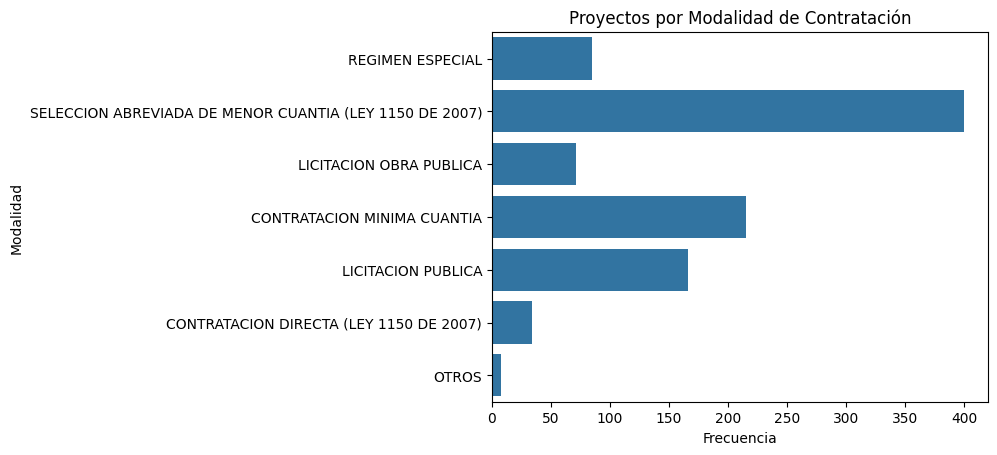

In [39]:
# Grafíco de barras de las modalidades de contratación
sns.countplot(data = datos, y = 'modalidad_reducido')
plt.title('Proyectos por Modalidad de Contratación')
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad')
plt.show()

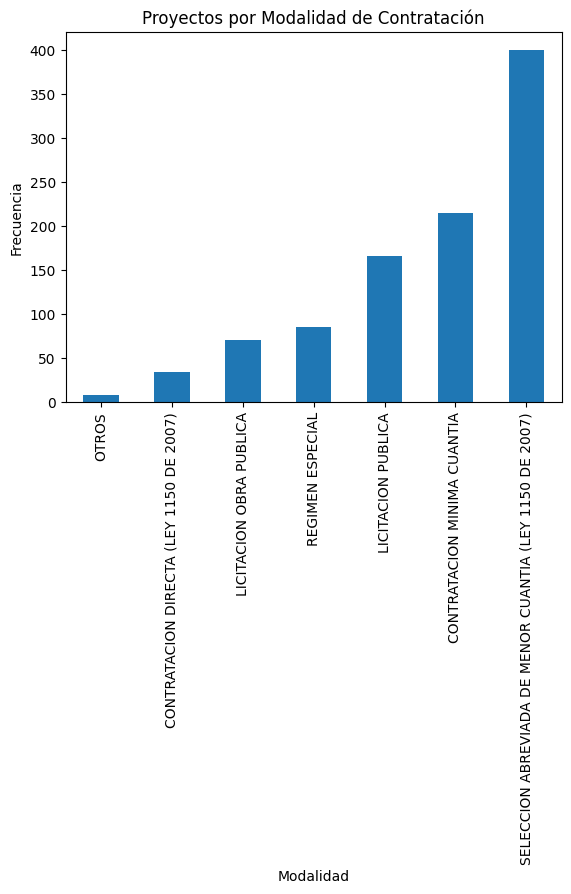

In [40]:
# Gráfico de Barras Verticales
datos['modalidad_reducido'].value_counts(ascending=True).plot.bar()
plt.title('Proyectos por Modalidad de Contratación')
plt.ylabel('Frecuencia')
plt.xlabel('Modalidad')
plt.show()

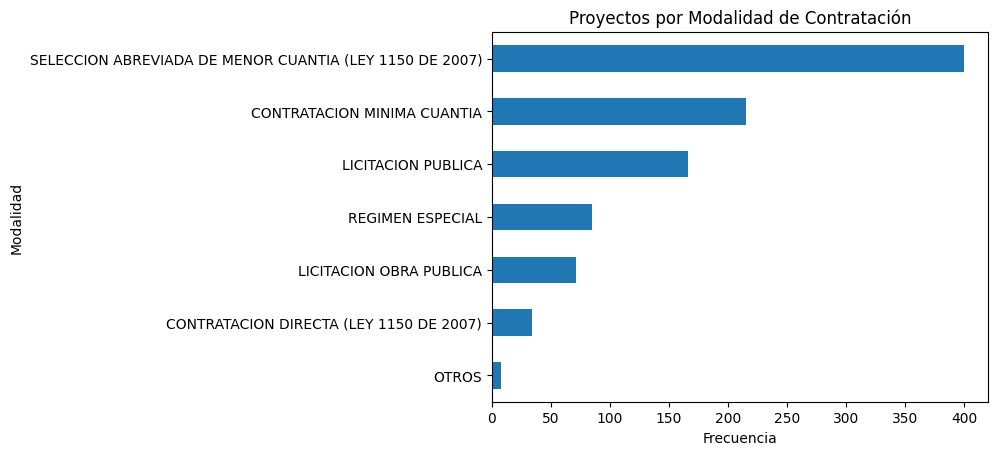

In [41]:
# Gráfico de Barras Horizontales
datos['modalidad_reducido'].value_counts(ascending=True).plot.barh()
plt.title('Proyectos por Modalidad de Contratación')
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad')
plt.show()

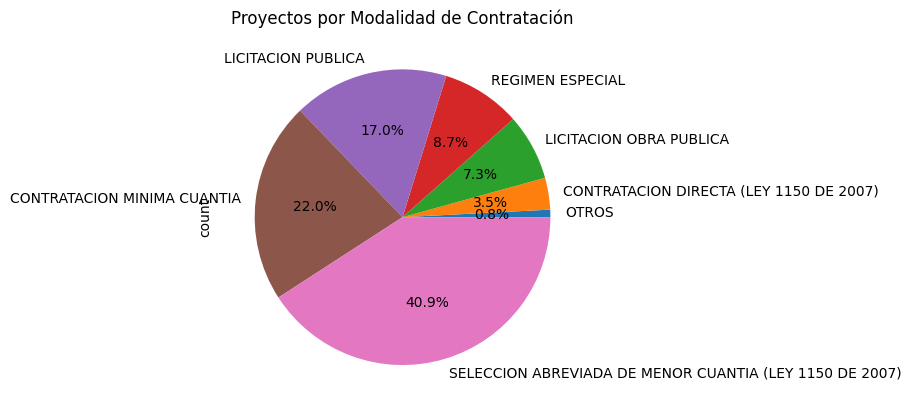

In [42]:
# Gráfico de torta
datos['modalidad_reducido'].value_counts(ascending=True).plot.pie(autopct='%1.1f%%')
plt.title('Proyectos por Modalidad de Contratación')
plt.show()

> <font color="green">**Tip Práctico:** Revise las variables categórica con el fin de identificar tareas de estandarización (agrupar, reducir, estandarizar categorías, entre otros). En este caso podriamos combinar las modalidades de LICITACION PUBLICA Y LICITACION DE OBRA PUBLICA.</font>

In [43]:
# Proyectos con desviaciones en costo por modalidad de contratación
proyectos_desv_costo = pd.crosstab(datos['modalidad_reducido'], datos['tiene_sobrecosto'])
proyectos_desv_costo

tiene_sobrecosto,False,True
modalidad_reducido,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),30,4
CONTRATACION MINIMA CUANTIA,185,30
LICITACION OBRA PUBLICA,50,21
LICITACION PUBLICA,124,42
OTROS,8,0
REGIMEN ESPECIAL,78,7
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),317,83


In [44]:
# Porcentaje de proyectos con desviaciones en costo por modalidad de contratación
proyectos_desv_costo_perc = pd.crosstab(datos['modalidad_reducido'], datos['tiene_sobrecosto'], normalize='index')
proyectos_desv_costo_perc

tiene_sobrecosto,False,True
modalidad_reducido,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),0.882353,0.117647
CONTRATACION MINIMA CUANTIA,0.860465,0.139535
LICITACION OBRA PUBLICA,0.704225,0.295775
LICITACION PUBLICA,0.746988,0.253012
OTROS,1.000000,0.000000
REGIMEN ESPECIAL,0.917647,0.082353
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),0.792500,0.207500


<Axes: ylabel='modalidad_reducido'>

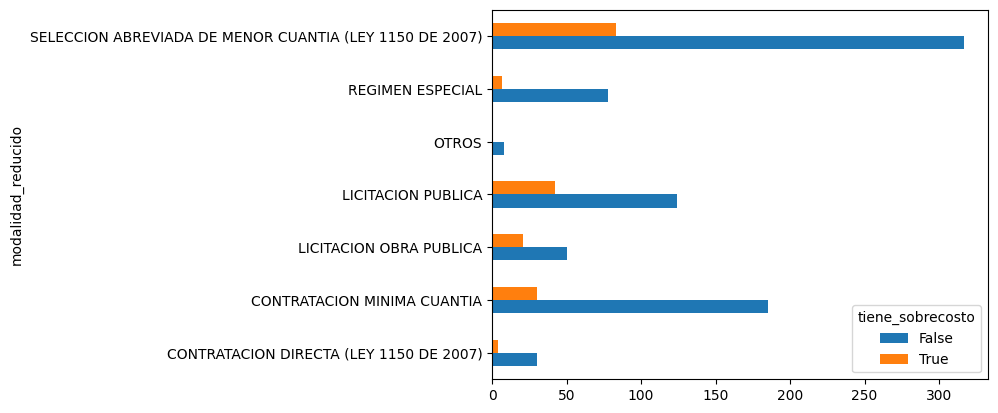

In [45]:
proyectos_desv_costo.plot.barh()

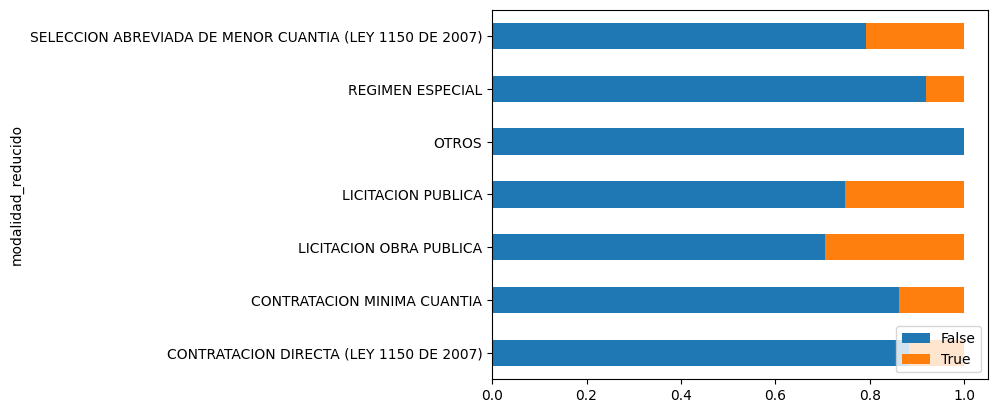

In [46]:
# Gráf
proyectos_desv_costo_perc.plot.barh(stacked=True)
plt.legend(loc='lower right')
plt.show()

In [47]:
# Sobrecosto porcentual por modalidad
sobrecostos_modalidad = datos.loc[datos['sobrecosto_porcentual'] > 0, ['modalidad','sobrecosto_porcentual']]
sobrecostos_modalidad.groupby('modalidad')['sobrecosto_porcentual'].mean().sort_values(ascending=False)

,sobrecosto_porcentual
modalidad,
CONTRATACION DIRECTA (LEY 1150 DE 2007),55.379930
CONTRATACION MINIMA CUANTIA,35.481702
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),34.125097
REGIMEN ESPECIAL,28.356730
LICITACION PUBLICA,24.646579
LICITACION OBRA PUBLICA,16.331797


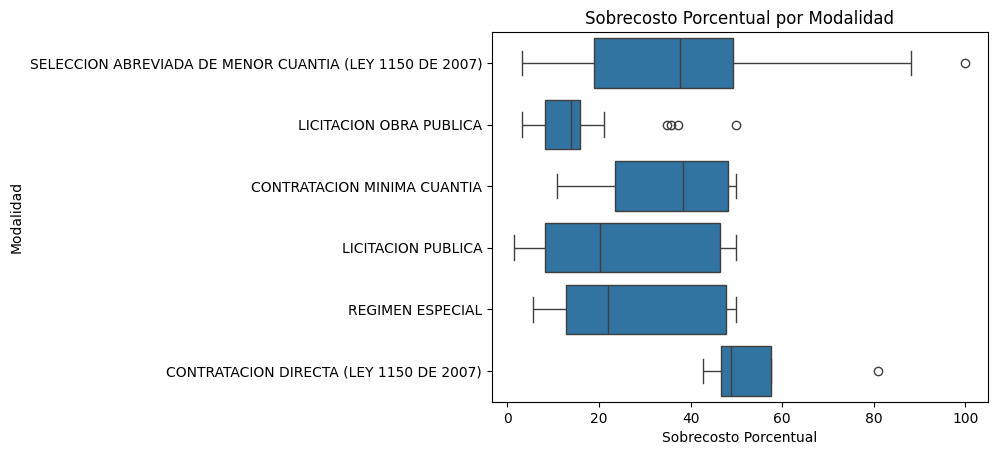

In [48]:
# Sobrecosto porcentual por modalidad
sns.boxplot(data=sobrecostos_modalidad, x='sobrecosto_porcentual', y='modalidad')
plt.title('Sobrecosto Porcentual por Modalidad')
plt.xlabel('Sobrecosto Porcentual')
plt.ylabel('Modalidad')
plt.show()

**Conclusiones:**

*
*
*
*
*

**Lista de tareas de limpieza:**

* Tarea 1:
* Tarea 2:

**Análisis de Desviaciones en Tiempo por Modalidad**

In [49]:
# Proyectos con desviaciones en tiempo por modalidad de contratación


In [50]:
# Porcentaje de proyectos con desviaciones en tiempo por modalidad de contratación


In [51]:
# Gráfico de proyectos con desviaciones en tiempo por modalidad


In [52]:
# Gráfico barras del porcentaje de desviaciones en tiempo por modalidad


In [53]:
# Restraso porcentual promedio por modalidad


In [54]:
# Gráfico de caja: Retraso porcentual por modalidad


### Análisis de Desviaciones en Función del Valor del Contrato

In [55]:
# Resumen estadístico del valor del contrato
datos['cuantia_contrato'].describe()

,cuantia_contrato
count,979.000000
mean,561.916993
std,2795.751484
min,20.002440
25%,31.832085
50%,100.689586
75%,271.085014
max,51937.799600


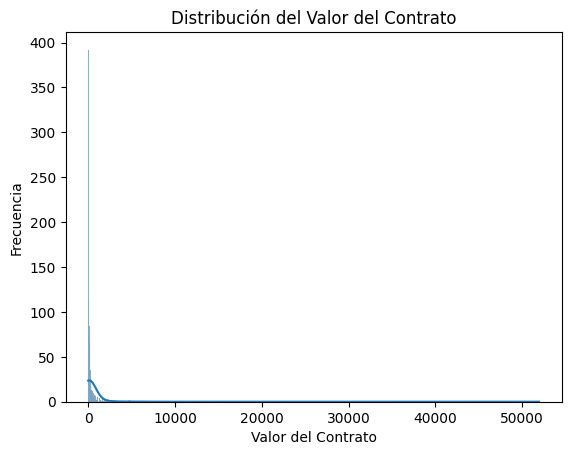

In [56]:
# Histograma del valor del contrato
sns.histplot(datos['cuantia_contrato'], kde=True)
plt.title('Distribución del Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.ylabel('Frecuencia')
plt.show()

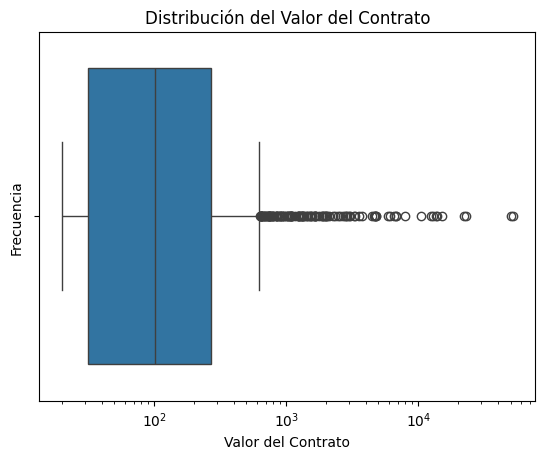

In [57]:
# Histograma del valor del contrato
sns.boxplot(x=datos['cuantia_contrato'])
plt.xscale('log')
plt.title('Distribución del Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.ylabel('Frecuencia')
plt.show()

> <font color="green">**Tip Práctico:** La discretización de variables numéricas, como la cuantía del contrato, puede facilitar su análisis al agrupar los valores en categorías significativas. Esto permite comparar de forma más sencilla segmentos de datos (por ejemplo, contratos pequeños, medianos y grandes) y observar tendencias, patrones o relaciones que podrían no ser evidentes con los valores continuos originales. Al definir estos rangos de manera lógica (e.g., cuantías bajas, medias y altas), también puedes mejorar la interpretabilidad de los resultados y simplificar el análisis exploratorio y visualización de datos.</font>

In [58]:
# Discretizar la variable del valor del contrato en los intervalos de 20, 100, 500, 1000, 5000, 10000
datos['cuantia_contrato_discreta'] = pd.cut(datos['cuantia_contrato'], bins=[20, 100, 500, 1000, 5000, 10000, np.infty])

In [59]:
# Proyectos según el rango del valor del contrato
datos.groupby(['cuantia_contrato_discreta']).size()

,0
cuantia_contrato_discreta,
"(20.0, 100.0]",488
"(100.0, 500.0]",345
"(500.0, 1000.0]",64
"(1000.0, 5000.0]",66
"(5000.0, 10000.0]",6
"(10000.0, inf]",10


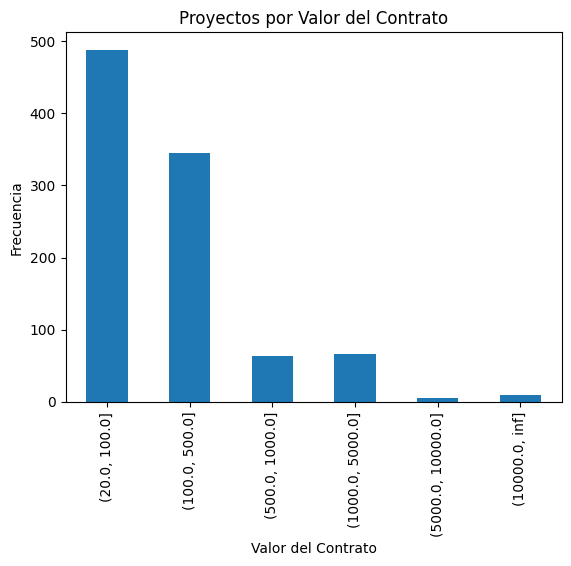

In [60]:
# Distribución de proyectos según el rango del valor del contrato
datos.groupby(['cuantia_contrato_discreta']).size().plot.bar()
plt.title('Proyectos por Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
# Resumen del valor del contrato vs variable binaria que indica si hay o no sobrecosto
datos.groupby('tiene_sobrecosto')['cuantia_contrato'].describe()

,count,mean,std,min,25%,50%,75%,max
tiene_sobrecosto,,,,,,,,
False,792.0,554.076190,3008.272204,20.002440,28.000000,98.645950,250.049380,51937.79960
True,187.0,595.125101,1615.949511,20.151616,59.558589,192.852426,442.569274,13971.57809


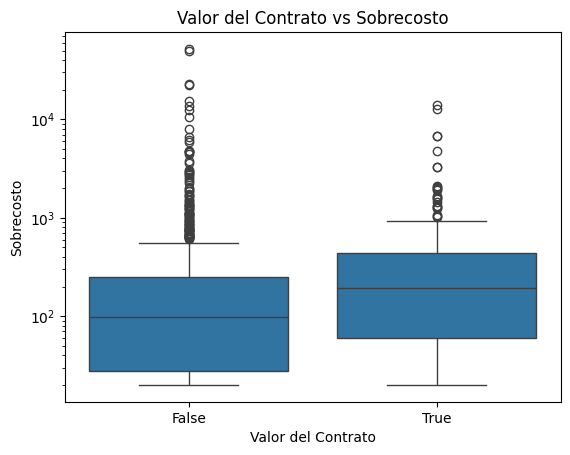

In [62]:
# Gráfico de caja del valor del contrato vs variable binaria que indica si hay o no sobrecosto
sns.boxplot(data=datos, x='tiene_sobrecosto', y='cuantia_contrato')
plt.title('Valor del Contrato vs Sobrecosto')
plt.xlabel('Valor del Contrato')
plt.ylabel('Sobrecosto')
plt.yscale('log')
plt.show()

In [63]:
# Proyectos con desviación en costo según el rango del valor del contrato
pd.crosstab(datos['cuantia_contrato_discreta'], datos['tiene_sobrecosto'])

tiene_sobrecosto,False,True
cuantia_contrato_discreta,,
"(20.0, 100.0]",423,65
"(100.0, 500.0]",261,84
"(500.0, 1000.0]",50,14
"(1000.0, 5000.0]",46,20
"(5000.0, 10000.0]",4,2
"(10000.0, inf]",8,2


In [64]:
# Porcentaje de Proyectos con desviación en costo según el rango del valor del contrato
pd.crosstab(datos['cuantia_contrato_discreta'], datos['tiene_sobrecosto'], normalize='index')


tiene_sobrecosto,False,True
cuantia_contrato_discreta,,
"(20.0, 100.0]",0.866803,0.133197
"(100.0, 500.0]",0.756522,0.243478
"(500.0, 1000.0]",0.781250,0.218750
"(1000.0, 5000.0]",0.696970,0.303030
"(5000.0, 10000.0]",0.666667,0.333333
"(10000.0, inf]",0.800000,0.200000


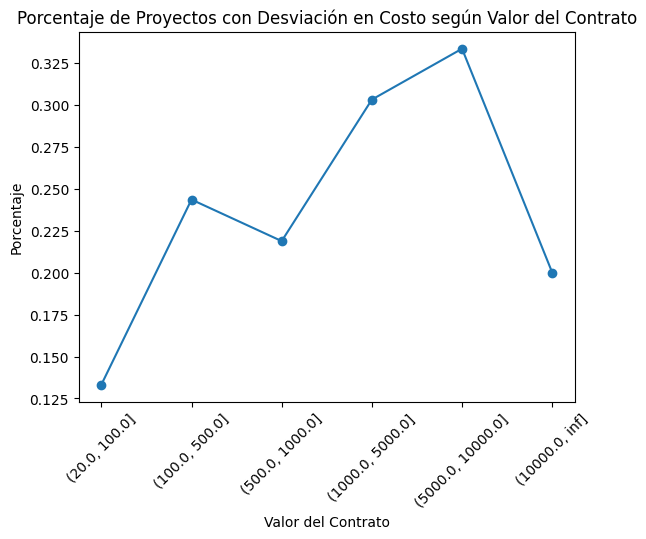

In [65]:
# Gráfico del porcentaje de proyectos con sobrecostos según el rango del valor del contrato
datos.groupby(['cuantia_contrato_discreta'])['tiene_sobrecosto'].mean().plot.line(marker='o')
plt.title('Porcentaje de Proyectos con Desviación en Costo según Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x
plt.ylabel('Porcentaje')
plt.show()


In [66]:
# Filtro de los datos de sobrecostos
sobrecostos = datos.loc[datos['sobrecosto_porcentual'] > 0, ['cuantia_contrato', 'cuantia_contrato_discreta','sobrecosto_porcentual']]
sobrecostos

,cuantia_contrato,cuantia_contrato_discreta,sobrecosto_porcentual
3,162.084746,"(100.0, 500.0]",46.272090
4,441.787828,"(100.0, 500.0]",35.809417
5,23.508500,"(20.0, 100.0]",49.303975
8,1250.571151,"(1000.0, 5000.0]",31.985385
12,288.881726,"(100.0, 500.0]",50.000000
...,...,...,...
953,21.784000,"(20.0, 100.0]",27.393959
957,1573.580425,"(1000.0, 5000.0]",3.148650
968,13971.578090,"(10000.0, inf]",49.900000
969,212.065482,"(100.0, 500.0]",30.635709


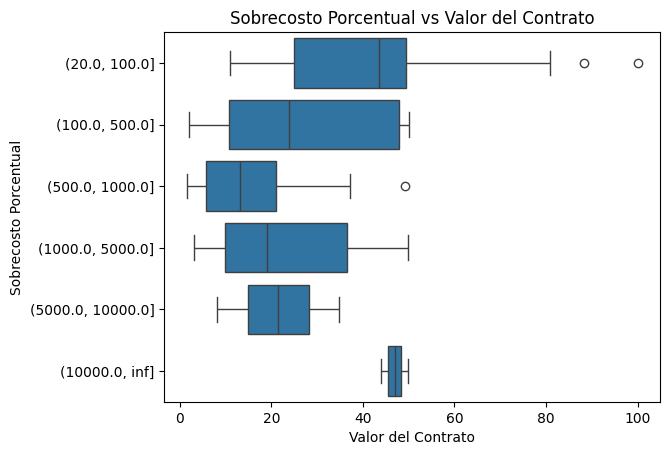

In [67]:
sns.boxplot(data=sobrecostos, x='sobrecosto_porcentual', y='cuantia_contrato_discreta')
plt.title('Sobrecosto Porcentual vs Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.ylabel('Sobrecosto Porcentual')
plt.show()

### Análisis de correlación entre la cuantía del contrato, la duración y el sobrecosto porcentual


In [68]:
# Filtrar datos con sobrecostos
sobrecosto = datos.loc[datos['sobrecosto_porcentual'] > 0, ['cuantia_contrato','duracion_contrato_dias','sobrecosto_porcentual']]
sobrecosto

,cuantia_contrato,duracion_contrato_dias,sobrecosto_porcentual
3,162.084746,90,46.272090
4,441.787828,30,35.809417
5,23.508500,60,49.303975
8,1250.571151,90,31.985385
12,288.881726,60,50.000000
...,...,...,...
953,21.784000,45,27.393959
957,1573.580425,120,3.148650
968,13971.578090,360,49.900000
969,212.065482,60,30.635709


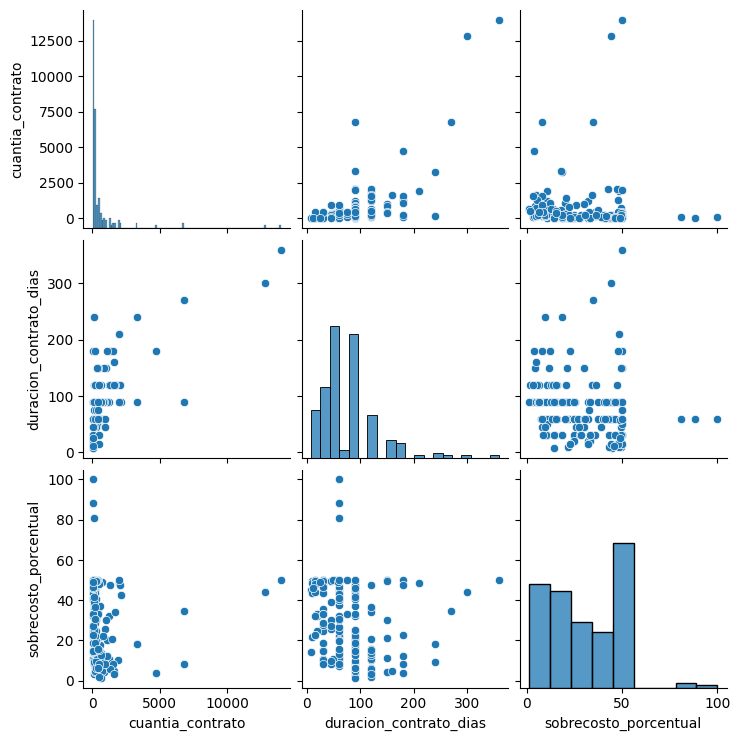

In [69]:
# Gráficos de dispersión entre pares de variables
sns.pairplot(sobrecosto)
plt.show()

In [70]:
# Matriz de correlación entre variables
sobrecosto.corr()

,cuantia_contrato,duracion_contrato_dias,sobrecosto_porcentual
cuantia_contrato,1.000000,0.665003,-0.032652
duracion_contrato_dias,0.665003,1.000000,-0.179205
sobrecosto_porcentual,-0.032652,-0.179205,1.000000


<Axes: >

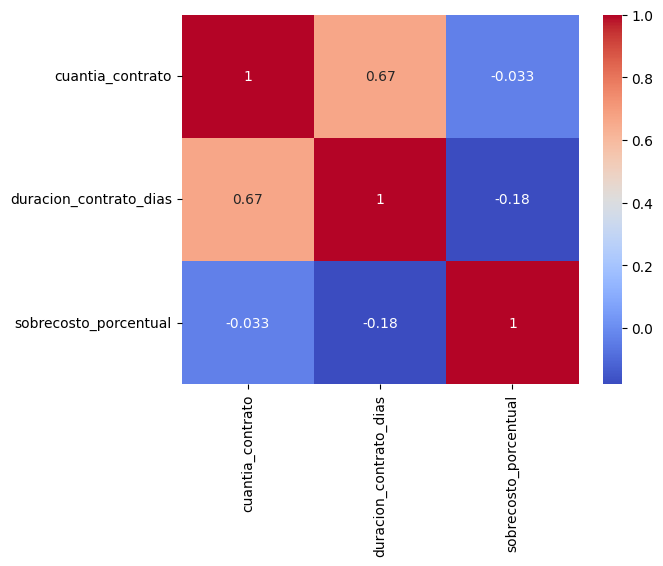

In [71]:
#. Gráfico de correlación
sns.heatmap(sobrecosto.corr(), annot=True, cmap='coolwarm')